In [1]:
import pickle
import pandas as pd
import pandas_datareader as pdr
from basic_analysis_toolkit import BasicAnalysis, get_avail_tickers
from company_toolkit import *
import datetime
from portfolio_toolkit import *
from frm_model import *
import math

In [2]:
sp500_dataframe = pickle.load(open('stock_dataframe.pickle', 'rb'))
cd = pickle.load(open('company_dictionary.pickle', 'rb'))

analysis = BasicAnalysis(sp500_dataframe)
start = datetime.date(day=2, month=1, year=2018)
end = datetime.date(day =2, month=1, year=2019)
#end = datetime.date.today()
working_dataframe = create_frm_sensitivities_unnormalized(start, analysis, cd, cd.keys()).dropna()
tickers = working_dataframe.index

In [3]:
# goal: for each industry, build a portfolio weighted based on the market cap of the company 
sector_portfolio_dictionary = {}
for ticker in tickers:
    c = cd.get(ticker)
    sector = c.info.get('Sector')
    if sector not in list(sector_portfolio_dictionary.keys()):
        list_companies = []
        pair = (ticker, c.market_cap())
        list_companies.append(pair)
        sector_portfolio_dictionary.update({sector : list_companies})
    else:
        list_companies = sector_portfolio_dictionary.pop(sector)
        pair = (ticker, c.market_cap())
        list_companies.append(pair)
        sector_portfolio_dictionary.update({sector : list_companies})
    
        
        

In [4]:
sectors = list(sector_portfolio_dictionary.keys())
d = {}
for sector in sectors:
    investment_value = 10000
    list_companies = sector_portfolio_dictionary.pop(sector)
    # creating the dataframe representing the historical performance of the stock
    tickers = [x[0] for x in list_companies]
    weights = [x[1] for x in list_companies]
    portfolio_dict = {}
    for i in range(len(tickers)):
        ticker = tickers[i]
        weight = weights[i]/sum(weights)
        old_share_price = analysis.get_close(ticker, start, start, 'B').values
        num_of_shares = math.floor(weight * investment_value / old_share_price)
        portfolio_dict.update({ticker : {'Date' : start, 'No of Shares' : num_of_shares, 'Initial Market Value' : 1}})
    d.update({sector : Portfolio(portfolio_dict)})
    

In [5]:
p = d.get('Basic Materials')

In [9]:
# looking at basic materials
# in terms of return, from 2018-2019, the only companies that made any return were MOS and ECL
# overall return was negative
p = d.get('Basic Materials')

# goal: stack the financials of the top performing stocks against each other 
companies = p.get_return_df(analysis, end).iloc[-1].sort_values(ascending=False)
bc = []
for i in range(7):
    ticker = companies.index[i]
    if ticker != 'Total Value':
        bc.append(ticker)
        


In [16]:
get_margin = lambda x : pd.to_numeric(cd.get(x).income['Operating Income or Loss'], errors = 'coerce')/pd.to_numeric(cd.get(x).income['Total Revenue'], errors='coerce')
margins = compare_values(bc, get_margin).fillna(method='pad')    

In [40]:
# make method to plot a series of company's info
#analysis.get_percent_change('AAPL', start, end, 'BM').plot()
# this method is to make it easier to graph the information in the 3 statements within a company object 
# since the scraping method stores the info as strings. 
def graph_data(df):
    new_df = pd.DataFrame()
    for column in df.columns:
        new_df[column] = pd.to_numeric(df[column], errors='coerce')
    return new_df
        

In [56]:
data = cd.get('BRK-B').income[['Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Income or Loss']]

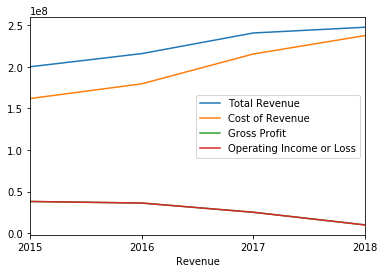

In [57]:
graph_data(data).plot()

In [58]:
frm = pickle.load(open('frm_2017_current.pickle', 'rb'))

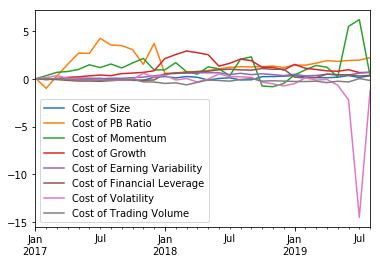

In [61]:
frm.complete_mc.plot()

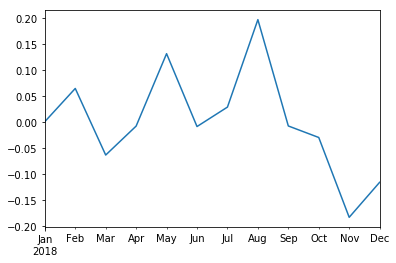

In [63]:
start = datetime.date(day=1, month=1, year=2018)
end = datetime.date(day=1, month=1, year=2019)
analysis.get_percent_change('AAPL', start, end, 'BM').plot()